# Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

# A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

# Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

# Fixing messy column names (containing spaces) for ease of use

In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

# Converting all objects to categorical codes

In [4]:
Company['Co_Code'] = (Company['Co_Code']).apply(str) 

In [5]:
for feature in Company.columns: 
    if Company[feature].dtype == 'object':
        Company[feature] = pd.Categorical(Company[feature]).codes 

# Checking top 5 rows again

In [6]:
Company.head()

Co_Code  Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0      459     1226            -8021.60          419.36  -7027.48   
1      704     3214            -3986.19         1954.93  -2968.08   
2      333       21            -3192.58           53.84    506.86   
3      963     1001            -3054.51          157.30   -623.49   
4      884      452            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current_Assets_  ...  PBIDTM_perc[Latest]  PBITM_perc[Latest]  \
0            40.50  ...                 0.00                0.00   
1           486.86  ...               -10.30              -39.74   
2          9097.64  ...             -5279.14            -5516.98   
3          1034.12  ...                -3.33               -7.21   
4          4685.81  ...              -295.55             -400.55   

   PBDTM_perc[Latest]  CPM_perc[Latest]  APATM_perc[Latest]  \
0                0.00              0.00                0.00   
1              -57.74            -57.74              -87.18   
2            -7780.25          -7723.67            -7961.51   
3              -48.13            -47.70              -51.58   
4             -845.88            379.79              274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

# Now, let us check the number of rows (observations) and the number of columns (variables)

In [7]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


# Checking datatype of all columns

In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int16  
 1   Co_Name                              3586 non-null   int16  
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

# Now, let us check the basic measures of descriptive statistics for the continuous variables


In [9]:

Company.describe()

Co_Code     Co_Name  Networth_Next_Year  Equity_Paid_Up  \
count  3586.00000  3586.00000         3586.000000     3586.000000   
mean   1792.50000  1792.50000          725.045251       62.966584   
std    1035.33336  1035.33336         4769.681004      778.761744   
min       0.00000     0.00000        -8021.600000        0.000000   
25%     896.25000   896.25000            3.985000        3.750000   
50%    1792.50000  1792.50000           19.015000        8.290000   
75%    2688.75000  2688.75000          123.802500       19.517500   
max    3585.00000  3585.00000       111729.100000    42263.460000   

           Networth  Capital_Employed     Total_Debt   Gross_Block_  \
count   3586.000000       3586.000000    3586.000000    3586.000000   
mean     649.746299       2799.611054    1994.823779     594.178829   
std     4091.988792      26975.135385   23652.842746    4871.547802   
min    -7027.480000      -1824.750000      -0.720000     -41.190000   
25%        3.892500          7.602500       0.030000       0.570000   
50%       18.580000         39.090000       7.490000      15.870000   
75%      117.297500        226.605000      72.350000     131.895000   
max    81657.350000     714001.250000  652823.810000  128477.590000   

       Net_Working_Capital_  Current_Assets_  ...  PBIDTM_perc[Latest]  \
count           3586.000000      3586.000000  ...          3585.000000   
mean             410.809665      1960.349172  ...           -51.162890   
std             6301.218546     22577.570829  ...          1795.131025   
min           -13162.420000        -0.910000  ...        -78870.450000   
25%                0.942500         4.000000  ...             0.000000   
50%               10.145000        24.540000  ...             8.070000   
75%               61.175000       135.277500  ...            18.990000   
max           223257.560000    721166.000000  ...         19233.330000   

       PBITM_perc[Latest]  PBDTM_perc[Latest]  CPM_perc[Latest]  \
count         3585.000000         3585.000000       3585.000000   
mean          -109.213414         -311.570357       -307.005632   
std           3057.635870        10921.592639      10676.149629   
min        -141600.000000      -590500.000000    -572000.000000   
25%              0.000000            0.000000          0.000000   
50%              5.230000            4.690000          3.890000   
75%             14.290000           14.110000         11.390000   
max          19195.700000        15640.000000      15640.000000   

       APATM_perc[Latest]  Debtors_Velocity_Days  Creditors_Velocity_Days  \
count         3585.000000            3586.000000             3.586000e+03   
mean          -365.056187             603.894032             2.057855e+03   
std          12500.051387           10636.759580             5.416948e+04   
min        -688600.000000               0.000000             0.000000e+00   
25%              0.000000               8.000000             8.000000e+00   
50%              1.590000              49.000000             3.900000e+01   
75%              7.410000             106.000000             8.900000e+01   
max          15266.670000          514721.000000             2.034145e+06   

       Inventory_Velocity_Days  Value_of_Output_to_Total_Assets  \
count              3483.000000                      3586.000000   
mean                 79.644559                         0.819757   
std                 137.847792                         1.201400   
min                -199.000000                        -0.330000   
25%                   0.000000                         0.070000   
50%                  35.000000                         0.480000   
75%                  96.000000                         1.160000   
max                 996.000000                        17.630000   

       Value_of_Output_to_Gross_Block  
count                     3586.000000  
mean                        61.884548  
std                        976.824352  
min                

In [10]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

Co_Code  Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
count  3586.00  3586.00             3586.00         3586.00   3586.00   
mean   1792.50  1792.50              725.05           62.97    649.75   
std    1035.33  1035.33             4769.68          778.76   4091.99   
min       0.00     0.00            -8021.60            0.00  -7027.48   
25%     896.25   896.25                3.98            3.75      3.89   
50%    1792.50  1792.50               19.02            8.29     18.58   
75%    2688.75  2688.75              123.80           19.52    117.30   
max    3585.00  3585.00           111729.10        42263.46  81657.35   

       Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
count           3586.00     3586.00       3586.00               3586.00   
mean            2799.61     1994.82        594.18                410.81   
std            26975.14    23652.84       4871.55               6301.22   
min            -1824.75       -0.72        -41.19             -13162.42   
25%                7.60        0.03          0.57                  0.94   
50%               39.09        7.49         15.87                 10.14   
75%              226.61       72.35        131.90                 61.17   
max           714001.25   652823.81     128477.59             223257.56   

       Current_Assets_  ...  PBIDTM_perc[Latest]  PBITM_perc[Latest]  \
count          3586.00  ...              3585.00             3585.00   
mean           1960.35  ...               -51.16             -109.21   
std           22577.57  ...              1795.13             3057.64   
min              -0.91  ...            -78870.45          -141600.00   
25%               4.00  ...                 0.00                0.00   
50%              24.54  ...                 8.07                5.23   
75%             135.28  ...                18.99               14.29   
max          721166.00  ...             19233.33            19195.70   

       PBDTM_perc[Latest]  CPM_perc[Latest]  APATM_perc[Latest]  \
count             3585.00           3585.00             3585.00   
mean              -311.57           -307.01             -365.06   
std              10921.59          10676.15            12500.05   
min            -590500.00        -572000.00          -688600.00   
25%                  0.00              0.00                0.00   
50%                  4.69              3.89                1.59   
75%                 14.11             11.39                7.41   
max              15640.00          15640.00            15266.67   

       Debtors_Velocity_Days  Creditors_Velocity_Days  \
count                3586.00                  3586.00   
mean                  603.89                  2057.85   
std                 10636.76                 54169.48   
min                     0.00                     0.00   
25%                     8.00                     8.00   
50%                    49.00                    39.00   
75%                   106.00                    89.00   
max                514721.00               2034145.00   

       Inventory_Velocity_Days  Value_of_Output_to_Total_Assets  \
count                  3483.00                          3586.00   
mean                     79.64                             0.82   
std                     137.85                             1.20   
min                    -199.00                            -0.33   
25%                       0.00                             0.07   
50%                      35.00                             0.48   
75%                      96.00                             1.16   
max                     996.00                            17.63   

       Value_of_Output_to_Gross_Block  
count                         3586.00  
mean                            61.88  
std                            976.82  
min                            -61.00  
25%                              0.27  
50%                              1.53  
75%                   

# Creating a binary target variable using 'Networth_Next_Year'


In [11]:
Company['default']=np.where(Company['Networth_Next_Year']<=0,1,0)

# Checking top 10 rows

In [12]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

# What does variable 'default' look like

In [13]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

# Checking proportion of default

In [14]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

# Lets check for missing values in the dataset

In [15]:
# Checking for Missing values

In [16]:
Company.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [17]:
Company.size

243848

In [18]:
Company.isnull().sum().sum()

118

In [19]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [20]:
Company_X

Co_Code  Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0         459     1226            -8021.60          419.36  -7027.48   
1         704     3214            -3986.19         1954.93  -2968.08   
2         333       21            -3192.58           53.84    506.86   
3         963     1001            -3054.51          157.30   -623.49   
4         884      452            -2967.36           50.30  -1070.83   
...       ...      ...                 ...             ...       ...   
3581     2440     1161            72677.77          501.30  62009.42   
3582     2456     3428            79162.19          296.50  34057.87   
3583       58     1260            88134.31         2427.95  67969.97   
3584       57     2035            91293.70         8245.46  81657.35   
3585      378      454           111729.10         1998.70  78270.80   

      Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0             -1007.24     5936.03        474.30              -1076.34   
1              4458.20     7410.18       9070.86              -1098.88   
2              7714.68     6944.54       1281.54               4496.25   
3              2353.88     2326.05       1033.69              -2612.42   
4              4675.33     5740.90       1084.20               1836.23   
...                ...         ...           ...                   ...   
3581         590576.00   496009.19       8463.30                  0.00   
3582          71906.06    37643.79      29848.44               2503.86   
3583         140686.75    55245.01     121643.45               6376.84   
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   

      Current_Assets_  ...  PBIDTM_perc[Latest]  PBITM_perc[Latest]  \
0               40.50  ...                 0.00                0.00   
1              486.86  ...               -10.30              -39.74   
2             9097.64  ...             -5279.14            -5516.98   
3             1034.12  ...                -3.33               -7.21   
4             4685.81  ...              -295.55             -400.55   
...               ...  ...                  ...                 ...   
3581        444633.50  ...                 0.00                0.00   
3582         11554.45  ...                39.92               32.17   
3583         89609.82  ...                 8.09                6.69   
3584         42353.59  ...                28.12               20.55   
3585         11947.10  ...                42.47               22.88   

      PBDTM_perc[Latest]  CPM_perc[Latest]  APATM_perc[Latest]  \
0                   0.00              0.00                0.00   
1                 -57.74            -57.74              -87.18   
2               -7780.25          -7723.67            -7961.51   
3                 -48.13            -47.70              -51.58   
4                -845.88            379.79              274.79   
...                  ...               ...                 ...   
3581                0.00              0.00                0.00   
3582               29.81             30.52               22.77   
3583                7.31              5.69                4.29   
3584               23.39             19.55               11.99   
3585               34.04             25.97                6.37   

      Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                         0                        0                    45.00   
1                        29                      101                     2.00   
2                        97                      558                     0.00   
3                        93                       63                     2.00   
4                      3887                      346                     0.00   
...                     ...                      ...                      ...   
3581                      0            

# Let's check the number of outliers per column

In [21]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [22]:
((Company_X > UL) | (Company_X < LL)).sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            262
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [23]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [24]:
Company_X.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [25]:
Company_X.isnull().sum().sum()

42149

In [26]:
Company_X.shape

(3586, 67)

In [27]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

# Let's visually inspect the missing values in our data

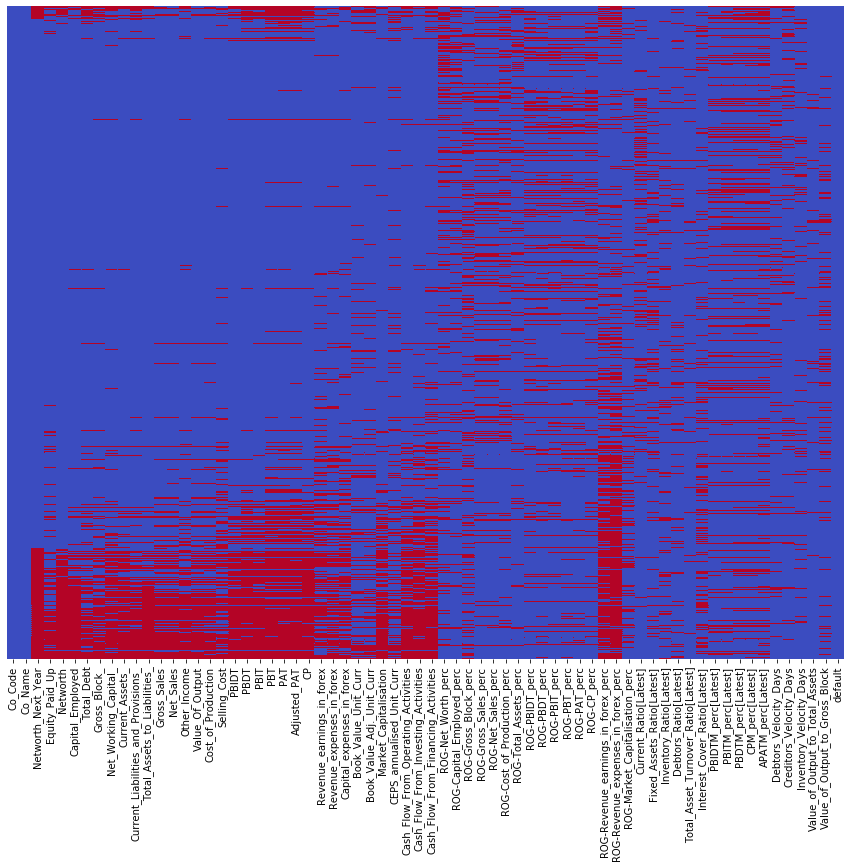

In [28]:
plt.figure(figsize = (15,12))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

# We should inspect total missing values by each row.

In [29]:
Company_sub1.isnull().sum(axis = 1)

0       20
1       35
2       44
3       37
4       36
        ..
3581    31
3582    37
3583    35
3584    31
3585    37
Length: 3586, dtype: int64

In [30]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [31]:
Company_sub1_temp.shape

(1201, 68)

In [32]:
Company_sub1_temp['default'].value_counts()

0    1083
1     118
Name: default, dtype: int64

In [33]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [34]:
95/388

0.24484536082474226

# Dropping columns with more than 30% missing values

In [35]:
from pandas import DataFrame
from IPython.display import HTML
pd.options.display.max_rows = 4000

In [36]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
PBT                                   0.26
APATM_perc[Latest]                    0.26
Cash_Flow_From_Investing_Activities   0.24
ROG-Gross_Block_perc                  0.23
CP                                    0.23
PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG-Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio[Latest]          0.20
CPM_perc[Latest]                      0.20
PBIT                                  0.20
PBITM_perc[Latest]                    0.20
PBDTM_perc[Latest]                    0.19
Capital_expenses_in_forex             0.19
Revenue_expenses_in_forex             0.19
Networth_Next_Year                    0.19
ROG-Cost_of_Production_perc           0.19
ROG-Gross_S

## Dropping columns with more than 30% missing values

In [37]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc','ROG-Revenue_earnings_in_forex_perc',], axis = 1)

In [38]:
Company_sub2.shape

(3586, 66)

# Segregate the predictors and response

In [39]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

# Scale the predictors

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [41]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

**Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.**

# Imputing the remaining missing values

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=10)

In [44]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [45]:
Company_imputed.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

## Inspect possible correlations between independent variables

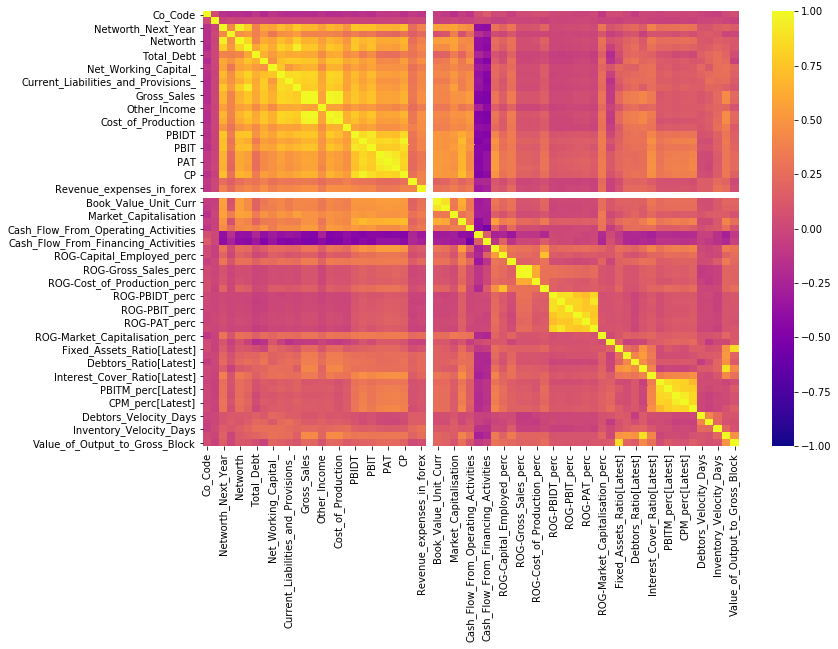

In [46]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [47]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

## Selecting the most relevant variable by using VIF Method

In [48]:
import statsmodels.formula.api as SM

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
X = Company_imputed.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables    VIF
13                            Net_Sales 244.05
15                      Value_Of_Output 161.21
12                          Gross_Sales  88.84
38                 ROG-Gross_Sales_perc  80.84
39                   ROG-Net_Sales_perc  80.65
22                                  PAT  23.84
19                                 PBDT  22.47
24                                   CP  19.18
16                   Cost_of_Production  17.11
11         Total_Assets_to_Liabilities_  14.90
4                              Networth  14.32
21                                  PBT  14.03
2                    Networth_Next_Year  13.10
5                      Capital_Employed  12.30
57                   PBDTM_perc[Latest]  11.70
23                         Adjusted_PAT  11.67
9                       Current_Assets_  11.27
20                                 PBIT  10.93
43                        ROG-PBDT_perc  10.67
18                                PBIDT   9.59
58                     CPM_perc[Latest]   9.30
47                          ROG-CP_perc   8.28
42                       ROG-PBIDT_perc   7.45
10  Current_Liabilities_and_Provisions_   7.13
45                         ROG-PBT_perc   6.82
44                        ROG-PBIT_perc   6.68
56                   PBITM_perc[Latest]   6.64
63      Value_of_Output_to_Total_Assets   6.10
28                 Book_Value_Unit_Curr   5.86
55                  PBIDTM_perc[Latest]   5.77
53   Total_Asset_Turnover_Ratio[Latest]   5.71
46                         ROG-PAT_perc   5.62
29            Book_Value_Adj._Unit_Curr   5.47
7                          Gross_Block_   4.64
50           Fixed_Assets_Ratio[Latest]   4.61
64       Value_of_Output_to_Gross_Block   4.58
59                   APATM_perc[Latest]   4.55
8                  Net_Working_Capital_   3.66
31            CEPS_annualised_Unit_Curr   3.42
36            ROG-Capital_Employed_perc   2.61
6                            Total_Debt   2.58
41                ROG-Total_Assets_perc   2.34
17                         Selling_Cost   2.25
35                   ROG-Net_Worth_perc   2.22
32  Cash_Flow_From_Operating_Activities   2.02
14                         Other_Income   2.00
34  Cash_Flow_From_Financing_Activities   1.99
30                Market_Capitalisation   1.89
54         Interest_Cover_Ratio[Latest]   1.84
40          ROG-Cost_of_Production_perc   1.74
3                        Equity_Paid_Up   1.66
33  Cash_Flow_From_Investing_Activities   1.65
51              Inventory_Ratio[Latest]   1.64
26            Revenue_expenses_in_forex   1.61
52                Debtors_Ratio[Latest]   1.61
37                 ROG-Gross_Block_perc   1.42
61              Creditors_Velocity_Days   1.41
60                Debtors_Velocity_Days   1.39
25            Revenue_earnings_in_forex   1.37
48       ROG-Market_Capitalisation_perc   1.30
62              Inventory_Velocity_Days   1.29
49                Current_Ratio[Latest]   1.28
0                               Co_Code   1.10
1                               Co_Name   1.02
27            Capital_expenses_in_forex    nan

In [51]:
X2 = X.drop('Net_Sales', axis = 1)
calc_vif(X2).sort_values(by = 'VIF', ascending = False)

variables   VIF
37                 ROG-Gross_Sales_perc 80.60
38                   ROG-Net_Sales_perc 80.39
14                      Value_Of_Output 64.14
12                          Gross_Sales 59.86
21                                  PAT 23.84
18                                 PBDT 22.43
23                                   CP 19.13
15                   Cost_of_Production 16.80
11         Total_Assets_to_Liabilities_ 14.86
4                              Networth 14.32
20                                  PBT 14.03
2                    Networth_Next_Year 13.09
5                      Capital_Employed 12.30
56                   PBDTM_perc[Latest] 11.69
22                         Adjusted_PAT 11.67
9                       Current_Assets_ 11.27
19                                 PBIT 10.89
42                        ROG-PBDT_perc 10.67
17                                PBIDT  9.53
57                     CPM_perc[Latest]  9.29
46                          ROG-CP_perc  8.28
41                       ROG-PBIDT_perc  7.45
10  Current_Liabilities_and_Provisions_  7.13
44                         ROG-PBT_perc  6.82
43                        ROG-PBIT_perc  6.68
55                   PBITM_perc[Latest]  6.64
62      Value_of_Output_to_Total_Assets  6.09
27                 Book_Value_Unit_Curr  5.86
54                  PBIDTM_perc[Latest]  5.76
52   Total_Asset_Turnover_Ratio[Latest]  5.69
45                         ROG-PAT_perc  5.62
28            Book_Value_Adj._Unit_Curr  5.47
7                          Gross_Block_  4.63
49           Fixed_Assets_Ratio[Latest]  4.61
63       Value_of_Output_to_Gross_Block  4.57
58                   APATM_perc[Latest]  4.55
8                  Net_Working_Capital_  3.65
30            CEPS_annualised_Unit_Curr  3.42
35            ROG-Capital_Employed_perc  2.61
6                            Total_Debt  2.57
40                ROG-Total_Assets_perc  2.34
16                         Selling_Cost  2.25
34                   ROG-Net_Worth_perc  2.22
31  Cash_Flow_From_Operating_Activities  2.02
13                         Other_Income  2.00
33  Cash_Flow_From_Financing_Activities  1.98
29                Market_Capitalisation  1.89
53         Interest_Cover_Ratio[Latest]  1.84
39          ROG-Cost_of_Production_perc  1.74
3                        Equity_Paid_Up  1.66
32  Cash_Flow_From_Investing_Activities  1.65
50              Inventory_Ratio[Latest]  1.64
25            Revenue_expenses_in_forex  1.61
51                Debtors_Ratio[Latest]  1.60
36                 ROG-Gross_Block_perc  1.42
60              Creditors_Velocity_Days  1.41
59                Debtors_Velocity_Days  1.39
24            Revenue_earnings_in_forex  1.37
47       ROG-Market_Capitalisation_perc  1.30
61              Inventory_Velocity_Days  1.29
48                Current_Ratio[Latest]  1.28
0                               Co_Code  1.10
1                               Co_Name  1.02
26            Capital_expenses_in_forex   nan

In [52]:
X3 = X2.drop('ROG-Gross_Sales_perc', axis = 1)
calc_vif(X3).sort_values(by = 'VIF', ascending = False)

variables   VIF
14                      Value_Of_Output 64.06
12                          Gross_Sales 59.77
21                                  PAT 23.81
18                                 PBDT 22.43
23                                   CP 19.12
15                   Cost_of_Production 16.80
11         Total_Assets_to_Liabilities_ 14.85
4                              Networth 14.31
20                                  PBT 13.96
2                    Networth_Next_Year 13.09
5                      Capital_Employed 12.30
55                   PBDTM_perc[Latest] 11.69
22                         Adjusted_PAT 11.66
9                       Current_Assets_ 11.27
19                                 PBIT 10.88
41                        ROG-PBDT_perc 10.67
17                                PBIDT  9.53
56                     CPM_perc[Latest]  9.29
45                          ROG-CP_perc  8.26
40                       ROG-PBIDT_perc  7.45
10  Current_Liabilities_and_Provisions_  7.13
43                         ROG-PBT_perc  6.82
42                        ROG-PBIT_perc  6.68
54                   PBITM_perc[Latest]  6.64
61      Value_of_Output_to_Total_Assets  6.09
27                 Book_Value_Unit_Curr  5.86
53                  PBIDTM_perc[Latest]  5.76
51   Total_Asset_Turnover_Ratio[Latest]  5.69
44                         ROG-PAT_perc  5.61
28            Book_Value_Adj._Unit_Curr  5.46
7                          Gross_Block_  4.63
48           Fixed_Assets_Ratio[Latest]  4.61
62       Value_of_Output_to_Gross_Block  4.57
57                   APATM_perc[Latest]  4.55
8                  Net_Working_Capital_  3.65
30            CEPS_annualised_Unit_Curr  3.42
35            ROG-Capital_Employed_perc  2.61
6                            Total_Debt  2.56
39                ROG-Total_Assets_perc  2.34
16                         Selling_Cost  2.25
34                   ROG-Net_Worth_perc  2.22
31  Cash_Flow_From_Operating_Activities  2.02
13                         Other_Income  2.00
33  Cash_Flow_From_Financing_Activities  1.98
29                Market_Capitalisation  1.89
52         Interest_Cover_Ratio[Latest]  1.84
37                   ROG-Net_Sales_perc  1.81
38          ROG-Cost_of_Production_perc  1.73
3                        Equity_Paid_Up  1.66
32  Cash_Flow_From_Investing_Activities  1.65
49              Inventory_Ratio[Latest]  1.64
25            Revenue_expenses_in_forex  1.61
50                Debtors_Ratio[Latest]  1.60
36                 ROG-Gross_Block_perc  1.42
59              Creditors_Velocity_Days  1.40
58                Debtors_Velocity_Days  1.39
24            Revenue_earnings_in_forex  1.37
46       ROG-Market_Capitalisation_perc  1.30
60              Inventory_Velocity_Days  1.29
47                Current_Ratio[Latest]  1.28
0                               Co_Code  1.10
1                               Co_Name  1.02
26            Capital_expenses_in_forex   nan

In [53]:
X4 = X3.drop('Value_Of_Output', axis = 1)
calc_vif(X4).sort_values(by = 'VIF', ascending = False)

variables   VIF
20                                  PAT 23.81
17                                 PBDT 22.41
22                                   CP 19.12
12                          Gross_Sales 18.34
14                   Cost_of_Production 15.69
11         Total_Assets_to_Liabilities_ 14.83
4                              Networth 14.29
19                                  PBT 13.94
2                    Networth_Next_Year 13.09
5                      Capital_Employed 12.26
54                   PBDTM_perc[Latest] 11.68
21                         Adjusted_PAT 11.66
9                       Current_Assets_ 11.20
18                                 PBIT 10.87
40                        ROG-PBDT_perc 10.67
16                                PBIDT  9.47
55                     CPM_perc[Latest]  9.28
44                          ROG-CP_perc  8.26
39                       ROG-PBIDT_perc  7.45
10  Current_Liabilities_and_Provisions_  7.11
42                         ROG-PBT_perc  6.81
41                        ROG-PBIT_perc  6.68
53                   PBITM_perc[Latest]  6.63
60      Value_of_Output_to_Total_Assets  6.08
26                 Book_Value_Unit_Curr  5.85
52                  PBIDTM_perc[Latest]  5.76
50   Total_Asset_Turnover_Ratio[Latest]  5.68
43                         ROG-PAT_perc  5.61
27            Book_Value_Adj._Unit_Curr  5.46
7                          Gross_Block_  4.62
47           Fixed_Assets_Ratio[Latest]  4.61
61       Value_of_Output_to_Gross_Block  4.57
56                   APATM_perc[Latest]  4.55
8                  Net_Working_Capital_  3.63
29            CEPS_annualised_Unit_Curr  3.42
34            ROG-Capital_Employed_perc  2.61
6                            Total_Debt  2.55
38                ROG-Total_Assets_perc  2.33
15                         Selling_Cost  2.25
33                   ROG-Net_Worth_perc  2.22
30  Cash_Flow_From_Operating_Activities  2.02
13                         Other_Income  2.00
32  Cash_Flow_From_Financing_Activities  1.98
28                Market_Capitalisation  1.89
51         Interest_Cover_Ratio[Latest]  1.84
36                   ROG-Net_Sales_perc  1.81
37          ROG-Cost_of_Production_perc  1.73
3                        Equity_Paid_Up  1.66
31  Cash_Flow_From_Investing_Activities  1.64
48              Inventory_Ratio[Latest]  1.64
24            Revenue_expenses_in_forex  1.61
49                Debtors_Ratio[Latest]  1.60
35                 ROG-Gross_Block_perc  1.41
58              Creditors_Velocity_Days  1.40
57                Debtors_Velocity_Days  1.39
23            Revenue_earnings_in_forex  1.37
45       ROG-Market_Capitalisation_perc  1.30
59              Inventory_Velocity_Days  1.28
46                Current_Ratio[Latest]  1.28
0                               Co_Code  1.10
1                               Co_Name  1.02
25            Capital_expenses_in_forex   nan

In [54]:
X5 = X4.drop('PAT', axis = 1)
calc_vif(X5).sort_values(by = 'VIF', ascending = False)

variables   VIF
17                                 PBDT 22.36
21                                   CP 18.90
12                          Gross_Sales 18.34
14                   Cost_of_Production 15.67
11         Total_Assets_to_Liabilities_ 14.83
4                              Networth 14.29
2                    Networth_Next_Year 13.08
5                      Capital_Employed 12.26
53                   PBDTM_perc[Latest] 11.68
9                       Current_Assets_ 11.20
18                                 PBIT 10.82
39                        ROG-PBDT_perc 10.67
16                                PBIDT  9.44
54                     CPM_perc[Latest]  9.28
43                          ROG-CP_perc  8.25
19                                  PBT  7.74
20                         Adjusted_PAT  7.73
38                       ROG-PBIDT_perc  7.44
10  Current_Liabilities_and_Provisions_  7.11
41                         ROG-PBT_perc  6.81
40                        ROG-PBIT_perc  6.67
52                   PBITM_perc[Latest]  6.63
59      Value_of_Output_to_Total_Assets  6.08
25                 Book_Value_Unit_Curr  5.85
51                  PBIDTM_perc[Latest]  5.76
49   Total_Asset_Turnover_Ratio[Latest]  5.67
42                         ROG-PAT_perc  5.60
26            Book_Value_Adj._Unit_Curr  5.46
7                          Gross_Block_  4.62
46           Fixed_Assets_Ratio[Latest]  4.61
60       Value_of_Output_to_Gross_Block  4.56
55                   APATM_perc[Latest]  4.55
8                  Net_Working_Capital_  3.63
28            CEPS_annualised_Unit_Curr  3.42
33            ROG-Capital_Employed_perc  2.61
6                            Total_Debt  2.54
37                ROG-Total_Assets_perc  2.33
15                         Selling_Cost  2.25
32                   ROG-Net_Worth_perc  2.22
29  Cash_Flow_From_Operating_Activities  2.02
13                         Other_Income  1.98
31  Cash_Flow_From_Financing_Activities  1.98
27                Market_Capitalisation  1.89
50         Interest_Cover_Ratio[Latest]  1.84
35                   ROG-Net_Sales_perc  1.81
36          ROG-Cost_of_Production_perc  1.73
3                        Equity_Paid_Up  1.66
30  Cash_Flow_From_Investing_Activities  1.64
47              Inventory_Ratio[Latest]  1.64
23            Revenue_expenses_in_forex  1.61
48                Debtors_Ratio[Latest]  1.60
34                 ROG-Gross_Block_perc  1.41
57              Creditors_Velocity_Days  1.40
56                Debtors_Velocity_Days  1.39
22            Revenue_earnings_in_forex  1.37
44       ROG-Market_Capitalisation_perc  1.30
58              Inventory_Velocity_Days  1.28
45                Current_Ratio[Latest]  1.27
0                               Co_Code  1.10
1                               Co_Name  1.02
24            Capital_expenses_in_forex   nan

In [55]:
X6 = X5.drop('PBDT', axis = 1)
calc_vif(X6).sort_values(by = 'VIF', ascending = False)

variables   VIF
12                          Gross_Sales 18.27
14                   Cost_of_Production 15.67
11         Total_Assets_to_Liabilities_ 14.82
4                              Networth 14.24
2                    Networth_Next_Year 13.08
5                      Capital_Employed 12.12
52                   PBDTM_perc[Latest] 11.64
9                       Current_Assets_ 11.11
38                        ROG-PBDT_perc 10.64
17                                 PBIT 10.29
16                                PBIDT  9.44
53                     CPM_perc[Latest]  9.28
42                          ROG-CP_perc  8.24
20                                   CP  7.89
19                         Adjusted_PAT  7.72
18                                  PBT  7.45
37                       ROG-PBIDT_perc  7.44
10  Current_Liabilities_and_Provisions_  7.10
40                         ROG-PBT_perc  6.80
39                        ROG-PBIT_perc  6.67
51                   PBITM_perc[Latest]  6.63
58      Value_of_Output_to_Total_Assets  6.08
24                 Book_Value_Unit_Curr  5.83
50                  PBIDTM_perc[Latest]  5.75
48   Total_Asset_Turnover_Ratio[Latest]  5.67
41                         ROG-PAT_perc  5.60
25            Book_Value_Adj._Unit_Curr  5.46
7                          Gross_Block_  4.61
45           Fixed_Assets_Ratio[Latest]  4.61
59       Value_of_Output_to_Gross_Block  4.56
54                   APATM_perc[Latest]  4.55
8                  Net_Working_Capital_  3.63
27            CEPS_annualised_Unit_Curr  3.42
32            ROG-Capital_Employed_perc  2.60
6                            Total_Debt  2.54
36                ROG-Total_Assets_perc  2.33
15                         Selling_Cost  2.25
31                   ROG-Net_Worth_perc  2.22
28  Cash_Flow_From_Operating_Activities  2.01
13                         Other_Income  1.98
30  Cash_Flow_From_Financing_Activities  1.97
26                Market_Capitalisation  1.88
49         Interest_Cover_Ratio[Latest]  1.84
34                   ROG-Net_Sales_perc  1.81
35          ROG-Cost_of_Production_perc  1.73
3                        Equity_Paid_Up  1.66
29  Cash_Flow_From_Investing_Activities  1.64
46              Inventory_Ratio[Latest]  1.63
22            Revenue_expenses_in_forex  1.60
47                Debtors_Ratio[Latest]  1.60
33                 ROG-Gross_Block_perc  1.41
56              Creditors_Velocity_Days  1.40
55                Debtors_Velocity_Days  1.39
21            Revenue_earnings_in_forex  1.37
43       ROG-Market_Capitalisation_perc  1.29
57              Inventory_Velocity_Days  1.28
44                Current_Ratio[Latest]  1.27
0                               Co_Code  1.10
1                               Co_Name  1.02
23            Capital_expenses_in_forex   nan

In [56]:
from sklearn.model_selection import train_test_split
y = Company_imputed['default']
X_train,X_test,y_train,y_test=train_test_split(predictors,response, test_size=0.33,random_state=42)
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [57]:
model_1 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth+Networth_Next_Year+Capital_Employed+Current_Assets_+PBIT+PBIDT+CP+Adjusted_PAT+Current_Liabilities_and_Provisions_+Value_of_Output_to_Total_Assets+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Net_Working_Capital_+CEPS_annualised_Unit_Curr+Total_Debt+Selling_Cost+Cash_Flow_From_Operating_Activities+Other_Income+Cash_Flow_From_Financing_Activities+Market_Capitalisation+Equity_Paid_Up+Cash_Flow_From_Investing_Activities+Revenue_expenses_in_forex+Creditors_Velocity_Days+Debtors_Velocity_Days+Revenue_earnings_in_forex+Inventory_Velocity_Days', data=Default_train).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.129358
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.6074
Time:                        18:43:20   Log-Likelihood:                -310.72
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.379e-182
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3058      0.397    -15.892      0.000      -7.083      -5.528
Gross_Sales                            -1.8901      0.760     -2.488      0.013      -3.379      -0.401
Cost_of_Production                      1.4369      0.642      2.240      0.025       0.180       2.694
Total_Assets_to_Liabilities_            0.8016      0.342      2.347      0.019       0.132       1.471
Networth                                0.9300      0.378      2.461      0.014       0.189       1.671
Networth_Next_Year                     -5.3528      0.619     -8.649      0.000      -6.566      -4.140
Capital_Employed                       -0.9736      0.377     -2.584      0.010      -1.712      -0.235
Current_Assets_                         0.9549      0.469      2.036      0.042       0.036       1.874
PBIT                                    0.8921      0.364      2.451      0.014       0.179       1.605
PBIDT                                  -1.8714      0.355     -5.269      0.000      -2.568      -1.175
CP                                      0.8550      0.316      2.704      0.007       0.235       1.475
Adjusted_PAT                           -0.3557      0.269     -1.324      0.185      -0.882       0.171
Current_Liabilities_and_Provisions_     0.8908      0.351      2.536      0.011       0.202       1.579
Value_of_Output_to_Total_Assets        -0.0707      0.154     -0.458      0.647      -0.373       0.232
Book_Value_Unit_Curr                   -3.8600      0.419     -9.204      0.000      -4.682      -3.038
Gross_Block_                            0.8254      0.301      2.744      0.006       0.236       1.415
Value_of_Output_to_Gross_Block         -0.4684      0.212     -2.206      0.027      -0.885      -0.052
Net_Working_Capital_                   -0.5714      0.349     -1.637      0.102      -1.256       0.113
CEPS_annualised_Unit_Curr              -0.3014      0.285     -1.057      0.290      -0.860       0.257
Total_Debt                              0.3013      0.271      1.112      0.266      -0.230       0.833
Selling_Cost                            0.1576      0.246      0.642      0.521      -0.324       0.639
Cash_Flow_From_Operating_Activities    -0.6272      0.211     -2.966      0.003      -1.042      -0.213
Other_Income                            0.3906      0.161      2.426      0.015       0.075       0.706
Cash_Flow_From_Financing_Activities    -0.1773      0.179     -0.993      0.321      -0.527       0.173
Market_Capitalisation                  -0.1041      0.221     -0.472      0.637      -0.537       0.328
Equity_Paid_Up                          0.0961      0.168      0.572      0.567      -0.233       0.425
Cash_Flow_From_Investing_Activities    -0.1612      0.193     -0.836      0.403      -0.539       0.217
Revenue_expenses_in_forex               0.3332      0.167      1.997      0.046       0.006       0.660
Creditors_Velocit

### Removing Value_of_Output_to_Total_Assets as it has pvalue of .6

In [58]:
model_2 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth+Networth_Next_Year+Capital_Employed+Current_Assets_+PBIT+PBIDT+CP+Adjusted_PAT+Current_Liabilities_and_Provisions_+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Net_Working_Capital_+CEPS_annualised_Unit_Curr+Total_Debt+Selling_Cost+Cash_Flow_From_Operating_Activities+Other_Income+Cash_Flow_From_Financing_Activities+Market_Capitalisation+Equity_Paid_Up+Cash_Flow_From_Investing_Activities+Revenue_expenses_in_forex+Creditors_Velocity_Days+Debtors_Velocity_Days+Revenue_earnings_in_forex+Inventory_Velocity_Days', data=Default_train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.129402
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.6072
Time:                        18:43:20   Log-Likelihood:                -310.82
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.493e-183
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3027      0.396    -15.902      0.000      -7.080      -5.526
Gross_Sales                            -1.9045      0.759     -2.508      0.012      -3.393      -0.416
Cost_of_Production                      1.4345      0.643      2.232      0.026       0.175       2.694
Total_Assets_to_Liabilities_            0.8242      0.337      2.448      0.014       0.164       1.484
Networth                                0.9419      0.377      2.495      0.013       0.202       1.682
Networth_Next_Year                     -5.3501      0.618     -8.656      0.000      -6.562      -4.139
Capital_Employed                       -0.9706      0.376     -2.580      0.010      -1.708      -0.233
Current_Assets_                         0.9661      0.470      2.055      0.040       0.045       1.888
PBIT                                    0.8989      0.364      2.472      0.013       0.186       1.612
PBIDT                                  -1.8805      0.354     -5.311      0.000      -2.574      -1.187
CP                                      0.8543      0.316      2.703      0.007       0.235       1.474
Adjusted_PAT                           -0.3646      0.268     -1.361      0.173      -0.889       0.160
Current_Liabilities_and_Provisions_     0.8848      0.352      2.513      0.012       0.195       1.575
Book_Value_Unit_Curr                   -3.8506      0.418     -9.215      0.000      -4.670      -3.032
Gross_Block_                            0.8063      0.299      2.699      0.007       0.221       1.392
Value_of_Output_to_Gross_Block         -0.5074      0.198     -2.556      0.011      -0.896      -0.118
Net_Working_Capital_                   -0.5806      0.350     -1.659      0.097      -1.267       0.105
CEPS_annualised_Unit_Curr              -0.3082      0.284     -1.084      0.278      -0.865       0.249
Total_Debt                              0.3113      0.270      1.152      0.249      -0.218       0.841
Selling_Cost                            0.1421      0.244      0.582      0.561      -0.337       0.621
Cash_Flow_From_Operating_Activities    -0.6235      0.211     -2.957      0.003      -1.037      -0.210
Other_Income                            0.3844      0.161      2.395      0.017       0.070       0.699
Cash_Flow_From_Financing_Activities    -0.1742      0.178     -0.979      0.328      -0.523       0.175
Market_Capitalisation                  -0.1023      0.220     -0.465      0.642      -0.533       0.329
Equity_Paid_Up                          0.0993      0.168      0.592      0.554      -0.229       0.428
Cash_Flow_From_Investing_Activities    -0.1575      0.193     -0.817      0.414      -0.535       0.220
Revenue_expenses_in_forex               0.3251      0.165      1.971      0.049       0.002       0.648
Creditors_Velocity_Days                 0.1272      0.115      1.110      0.267      -0.097       0.352
Debtors_Velocity_

### Removing Debtors_Velocity_Days as it has p value of 1

In [60]:
model_2 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth+Networth_Next_Year+Capital_Employed+Current_Assets_+PBIT+PBIDT+CP+Adjusted_PAT+Current_Liabilities_and_Provisions_+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Net_Working_Capital_+CEPS_annualised_Unit_Curr+Total_Debt+Selling_Cost+Cash_Flow_From_Operating_Activities+Other_Income+Cash_Flow_From_Financing_Activities+Market_Capitalisation+Equity_Paid_Up+Cash_Flow_From_Investing_Activities+Revenue_expenses_in_forex+Creditors_Velocity_Days+Revenue_earnings_in_forex+Inventory_Velocity_Days', data=Default_train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.129402
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.6072
Time:                        18:43:20   Log-Likelihood:                -310.82
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.461e-183
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3027      0.396    -15.921      0.000      -7.079      -5.527
Gross_Sales                            -1.9045      0.757     -2.515      0.012      -3.388      -0.421
Cost_of_Production                      1.4345      0.641      2.239      0.025       0.179       2.690
Total_Assets_to_Liabilities_            0.8242      0.335      2.460      0.014       0.168       1.481
Networth                                0.9419      0.377      2.501      0.012       0.204       1.680
Networth_Next_Year                     -5.3501      0.618     -8.657      0.000      -6.561      -4.139
Capital_Employed                       -0.9706      0.374     -2.598      0.009      -1.703      -0.238
Current_Assets_                         0.9661      0.469      2.058      0.040       0.046       1.886
PBIT                                    0.8989      0.363      2.477      0.013       0.188       1.610
PBIDT                                  -1.8805      0.354     -5.314      0.000      -2.574      -1.187
CP                                      0.8542      0.316      2.705      0.007       0.235       1.473
Adjusted_PAT                           -0.3646      0.268     -1.361      0.173      -0.889       0.160
Current_Liabilities_and_Provisions_     0.8848      0.352      2.513      0.012       0.195       1.575
Book_Value_Unit_Curr                   -3.8506      0.418     -9.216      0.000      -4.670      -3.032
Gross_Block_                            0.8063      0.299      2.700      0.007       0.221       1.392
Value_of_Output_to_Gross_Block         -0.5074      0.197     -2.570      0.010      -0.894      -0.120
Net_Working_Capital_                   -0.5806      0.349     -1.664      0.096      -1.264       0.103
CEPS_annualised_Unit_Curr              -0.3082      0.283     -1.088      0.277      -0.863       0.247
Total_Debt                              0.3113      0.269      1.155      0.248      -0.217       0.839
Selling_Cost                            0.1421      0.244      0.582      0.561      -0.337       0.621
Cash_Flow_From_Operating_Activities    -0.6235      0.211     -2.961      0.003      -1.036      -0.211
Other_Income                            0.3844      0.160      2.398      0.016       0.070       0.699
Cash_Flow_From_Financing_Activities    -0.1742      0.178     -0.979      0.328      -0.523       0.174
Market_Capitalisation                  -0.1023      0.220     -0.465      0.642      -0.533       0.329
Equity_Paid_Up                          0.0993      0.167      0.593      0.553      -0.229       0.427
Cash_Flow_From_Investing_Activities    -0.1575      0.193     -0.818      0.413      -0.535       0.220
Revenue_expenses_in_forex               0.3251      0.165      1.975      0.048       0.002       0.648
Creditors_Velocity_Days                 0.1272      0.108      1.182      0.237      -0.084       0.338
Revenue_earnings_

# Removing market captalisation as it has p value of .642

In [62]:
model_3 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth+Networth_Next_Year+Capital_Employed+Current_Assets_+PBIT+PBIDT+CP+Adjusted_PAT+Current_Liabilities_and_Provisions_+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Net_Working_Capital_+CEPS_annualised_Unit_Curr+Total_Debt+Selling_Cost+Cash_Flow_From_Operating_Activities+Other_Income+Cash_Flow_From_Financing_Activities+Equity_Paid_Up+Cash_Flow_From_Investing_Activities+Revenue_expenses_in_forex+Creditors_Velocity_Days+Revenue_earnings_in_forex+Inventory_Velocity_Days', data=Default_train).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.129449
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.6071
Time:                        18:43:21   Log-Likelihood:                -310.94
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.757e-184
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3088      0.397    -15.901      0.000      -7.086      -5.531
Gross_Sales                            -1.9922      0.739     -2.696      0.007      -3.441      -0.544
Cost_of_Production                      1.5133      0.621      2.437      0.015       0.296       2.730
Total_Assets_to_Liabilities_            0.8144      0.334      2.441      0.015       0.161       1.468
Networth                                0.9195      0.374      2.457      0.014       0.186       1.653
Networth_Next_Year                     -5.3544      0.616     -8.690      0.000      -6.562      -4.147
Capital_Employed                       -0.9822      0.373     -2.634      0.008      -1.713      -0.251
Current_Assets_                         0.9673      0.467      2.070      0.038       0.052       1.883
PBIT                                    0.9111      0.362      2.520      0.012       0.203       1.620
PBIDT                                  -1.8879      0.355     -5.320      0.000      -2.583      -1.192
CP                                      0.8472      0.315      2.688      0.007       0.230       1.465
Adjusted_PAT                           -0.3779      0.265     -1.426      0.154      -0.897       0.141
Current_Liabilities_and_Provisions_     0.8877      0.352      2.525      0.012       0.199       1.577
Book_Value_Unit_Curr                   -3.8473      0.419     -9.184      0.000      -4.668      -3.026
Gross_Block_                            0.7943      0.297      2.676      0.007       0.213       1.376
Value_of_Output_to_Gross_Block         -0.5205      0.196     -2.659      0.008      -0.904      -0.137
Net_Working_Capital_                   -0.5734      0.345     -1.660      0.097      -1.251       0.104
CEPS_annualised_Unit_Curr              -0.3005      0.283     -1.061      0.289      -0.856       0.255
Total_Debt                              0.3058      0.269      1.137      0.255      -0.221       0.833
Selling_Cost                            0.1411      0.245      0.577      0.564      -0.338       0.621
Cash_Flow_From_Operating_Activities    -0.6193      0.210     -2.953      0.003      -1.030      -0.208
Other_Income                            0.3803      0.159      2.385      0.017       0.068       0.693
Cash_Flow_From_Financing_Activities    -0.1816      0.177     -1.024      0.306      -0.529       0.166
Equity_Paid_Up                          0.0953      0.168      0.569      0.569      -0.233       0.424
Cash_Flow_From_Investing_Activities    -0.1557      0.192     -0.810      0.418      -0.532       0.221
Revenue_expenses_in_forex               0.3210      0.165      1.945      0.052      -0.002       0.645
Creditors_Velocity_Days                 0.1231      0.107      1.147      0.252      -0.087       0.334
Revenue_earnings_in_forex              -0.3567      0.179     -1.990      0.047      -0.708      -0.005
Inventory_Velocit

## Removing Selling cost and Equity paid up as both has p value of .5

In [64]:
model_4 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth+Networth_Next_Year+Capital_Employed+Current_Assets_+PBIT+PBIDT+CP+Adjusted_PAT+Current_Liabilities_and_Provisions_+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Net_Working_Capital_+CEPS_annualised_Unit_Curr+Total_Debt+Cash_Flow_From_Operating_Activities+Other_Income+Cash_Flow_From_Financing_Activities+Cash_Flow_From_Investing_Activities+Revenue_expenses_in_forex+Creditors_Velocity_Days+Revenue_earnings_in_forex+Inventory_Velocity_Days', data=Default_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.129572
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.6067
Time:                        18:43:21   Log-Likelihood:                -311.23
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.936e-186
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3123      0.397    -15.918      0.000      -7.090      -5.535
Gross_Sales                            -1.9677      0.728     -2.703      0.007      -3.395      -0.541
Cost_of_Production                      1.4999      0.616      2.434      0.015       0.292       2.708
Total_Assets_to_Liabilities_            0.8130      0.335      2.426      0.015       0.156       1.470
Networth                                0.9554      0.372      2.571      0.010       0.227       1.684
Networth_Next_Year                     -5.3145      0.612     -8.685      0.000      -6.514      -4.115
Capital_Employed                       -0.9828      0.372     -2.639      0.008      -1.713      -0.253
Current_Assets_                         0.9360      0.467      2.006      0.045       0.021       1.851
PBIT                                    0.9063      0.358      2.530      0.011       0.204       1.609
PBIDT                                  -1.8911      0.354     -5.347      0.000      -2.584      -1.198
CP                                      0.8311      0.315      2.642      0.008       0.215       1.448
Adjusted_PAT                           -0.3708      0.266     -1.394      0.163      -0.892       0.150
Current_Liabilities_and_Provisions_     0.9357      0.346      2.706      0.007       0.258       1.613
Book_Value_Unit_Curr                   -3.8745      0.412     -9.407      0.000      -4.682      -3.067
Gross_Block_                            0.8102      0.297      2.727      0.006       0.228       1.393
Value_of_Output_to_Gross_Block         -0.5154      0.194     -2.659      0.008      -0.895      -0.136
Net_Working_Capital_                   -0.5578      0.344     -1.622      0.105      -1.232       0.116
CEPS_annualised_Unit_Curr              -0.2819      0.283     -0.997      0.319      -0.836       0.272
Total_Debt                              0.3412      0.263      1.298      0.194      -0.174       0.856
Cash_Flow_From_Operating_Activities    -0.6108      0.210     -2.915      0.004      -1.021      -0.200
Other_Income                            0.3917      0.159      2.466      0.014       0.080       0.703
Cash_Flow_From_Financing_Activities    -0.1875      0.178     -1.054      0.292      -0.536       0.161
Cash_Flow_From_Investing_Activities    -0.1586      0.194     -0.816      0.414      -0.539       0.222
Revenue_expenses_in_forex               0.3270      0.165      1.982      0.047       0.004       0.650
Creditors_Velocity_Days                 0.1195      0.107      1.121      0.262      -0.089       0.329
Revenue_earnings_in_forex              -0.3222      0.174     -1.850      0.064      -0.664       0.019
Inventory_Velocity_Days                -0.2017      0.145     -1.389      0.165      -0.486       0.083
=======================================================================================================

Possibly complet

### Removing Inventory_Velocity_Days, Creditors_Velocity_Days, Cash_Flow_From_Investing_Activities, Cash_Flow_From_Financing_Activities ,CEPS_annualised_Unit_Curr, Networth, Total_Debt, Net_Working_Capital_, Total_Dept, CEPS_annualised_Unit_Curr, Net_Worth,Current_Assets_ Revenue_earnings_in_forex  , CP, Revenue_expenses_in_forex , Cash_Flow_From_Operating_Activitiesand Adjusted_PAT

In [65]:
model_4 = SM.logit(formula = 'default~Gross_Sales+Cost_of_Production+Total_Assets_to_Liabilities_+Networth_Next_Year+Capital_Employed+PBIT+PBIDT+Current_Liabilities_and_Provisions_+Book_Value_Unit_Curr+Gross_Block_+Value_of_Output_to_Gross_Block+Other_Income', data=Default_train).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.135857
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:                  0.5876
Time:                        18:43:21   Log-Likelihood:                -326.33
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.040e-191
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.8887      0.355    -16.603      0.000      -6.584      -5.194
Gross_Sales                            -1.8995      0.681     -2.789      0.005      -3.235      -0.565
Cost_of_Production                      1.5744      0.579      2.717      0.007       0.439       2.710
Total_Assets_to_Liabilities_            0.9975      0.288      3.467      0.001       0.434       1.561
Networth_Next_Year                     -4.1058      0.440     -9.342      0.000      -4.967      -3.244
Capital_Employed                       -0.9410      0.346     -2.719      0.007      -1.619      -0.263
PBIT                                    1.1891      0.320      3.718      0.000       0.562       1.816
PBIDT                                  -1.8161      0.375     -4.845      0.000      -2.551      -1.081
Current_Liabilities_and_Provisions_     1.1553      0.263      4.385      0.000       0.639       1.672
Book_Value_Unit_Curr                   -3.7921      0.373    -10.164      0.000      -4.523      -3.061
Gross_Block_                            0.9572      0.262      3.655      0.000       0.444       1.471
Value_of_Output_to_Gross_Block         -0.5868      0.185     -3.166      0.002      -0.950      -0.224
Other_Income                            0.4342      0.151      2.875      0.004       0.138       0.730
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Prediction on the Data

## Train Data set:

In [66]:
y_prob_pred_train = model_4.predict(Default_train)

In [67]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [68]:
from sklearn import metrics

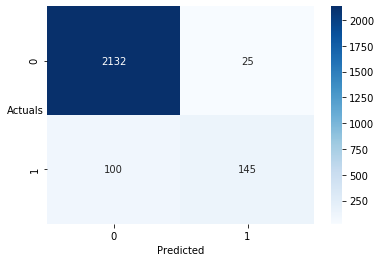

In [69]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [71]:
y_prob_pred_4 = model_4.predict()

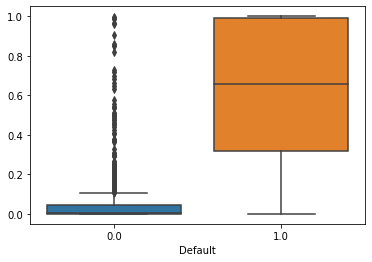

In [72]:
sns.boxplot(x=Default_train['default'],y=y_prob_pred_4)
plt.xlabel('Default');

## Choosing the optimal threshold

In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [75]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.23917684425040467

## Validating on the train set with revised threshold


In [77]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

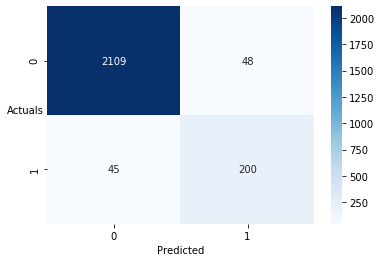

In [78]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

## Let us now go ahead and print the classification report to check the various other parameters.                                    

In [80]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.979     0.978     0.978      2157
         1.0      0.806     0.816     0.811       245

    accuracy                          0.961      2402
   macro avg      0.893     0.897     0.895      2402
weighted avg      0.961     0.961     0.961      2402



## Validating on the test set

In [82]:
y_prob_pred_test = model_4.predict(Default_test)

In [83]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

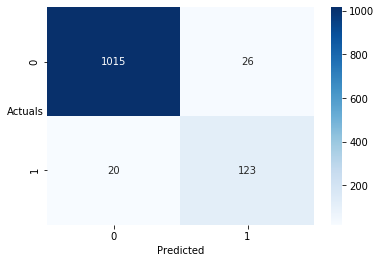

In [84]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [85]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.981     0.975     0.978      1041
         1.0      0.826     0.860     0.842       143

    accuracy                          0.961      1184
   macro avg      0.903     0.918     0.910      1184
weighted avg      0.962     0.961     0.961      1184



## Overall 96% of correct predictions to total predictions were made by the model.86% of those defaulted were correctly identified as defaulters by the model. So we can conclude that the Logistic regression on default SMOTE using STAT model is performing reasonably well.

# For modeling we will use Logistic Regression with recursive feature elimination

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [87]:
LogR = LogisticRegression()

In [88]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [89]:
selector = selector.fit(X_train, y_train)

In [90]:
selector.n_features_

15

In [91]:
selector.ranking_

array([ 8, 31,  1, 45, 15,  1, 18,  1, 17,  1,  1,  1,  9, 27,  4,  1,  1,
       35,  1,  1,  1, 36, 37, 41, 39, 12, 10, 51,  1,  1, 26, 49, 16, 30,
       19,  2,  3, 46, 20, 21, 22, 11, 43, 34, 14, 28, 13, 40, 50,  1,  5,
       25, 33, 44,  1, 38, 47,  6, 48,  7, 29, 32, 23, 24, 42])

# Validating the model on train and test set

In [92]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
2                    Networth_Next_Year     1
5                      Capital_Employed     1
7                          Gross_Block_     1
9                       Current_Assets_     1
10  Current_Liabilities_and_Provisions_     1
11         Total_Assets_to_Liabilities_     1
15                      Value_Of_Output     1
16                   Cost_of_Production     1
18                                PBIDT     1
19                                 PBDT     1
20                                 PBIT     1
28                 Book_Value_Unit_Curr     1
29            Book_Value_Adj._Unit_Curr     1
49                Current_Ratio[Latest]     1
54         Interest_Cover_Ratio[Latest]     1

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [95]:
print(confusion_matrix(y_train, pred_train))

[[2137   20]
 [  91  154]]


In [96]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.89      0.63      0.74       245

    accuracy                           0.95      2402
   macro avg       0.92      0.81      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [97]:
print(confusion_matrix(y_test, pred_test))

[[1024   17]
 [  46   97]]


In [98]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.85      0.68      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



**We see about 0.63 and 0.68 recall score for both train and test.Also both have f1 score of about 0.75.**

**As the model has only 10% of the data as defaults, we will now try to balance the data before fiting the model.**

## SMOTE Model

In [99]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [100]:
selector_smote = selector.fit(X_res, y_res)

In [101]:
selector_smote.n_features_

15

In [102]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [103]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      2157
         1.0       0.92      0.95      0.94      2157

    accuracy                           0.94      4314
   macro avg       0.94      0.94      0.94      4314
weighted avg       0.94      0.94      0.94      4314



In [104]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1041
         1.0       0.56      0.96      0.70       143

    accuracy                           0.90      1184
   macro avg       0.78      0.93      0.82      1184
weighted avg       0.94      0.90      0.91      1184



**Finally, we are able to achieve a descent recall value without overfitting.This model has a very high recall of 96%.**

**Which means it is 96% of the times accurately predicts the defaulter.Hence we can conclude that the logistic regression with SMOTE is the best model with high recall value.**

In [105]:
j=['default','Co_Name','Networth_Next_Year','Capital_Employed','Gross_Block_' ,'Current_Assets_','Current_Liabilities_and_Provisions_' ,'Total_Assets_to_Liabilities_' ,'Value_Of_Output','Cost_of_Production','PBIDT' ,'PBDT' ,'PBIT','Book_Value_Unit_Curr' ,'Book_Value_Adj._Unit_Curr' ,'Current_Ratio[Latest]','Interest_Cover_Ratio[Latest]']

## Univariate Analysis

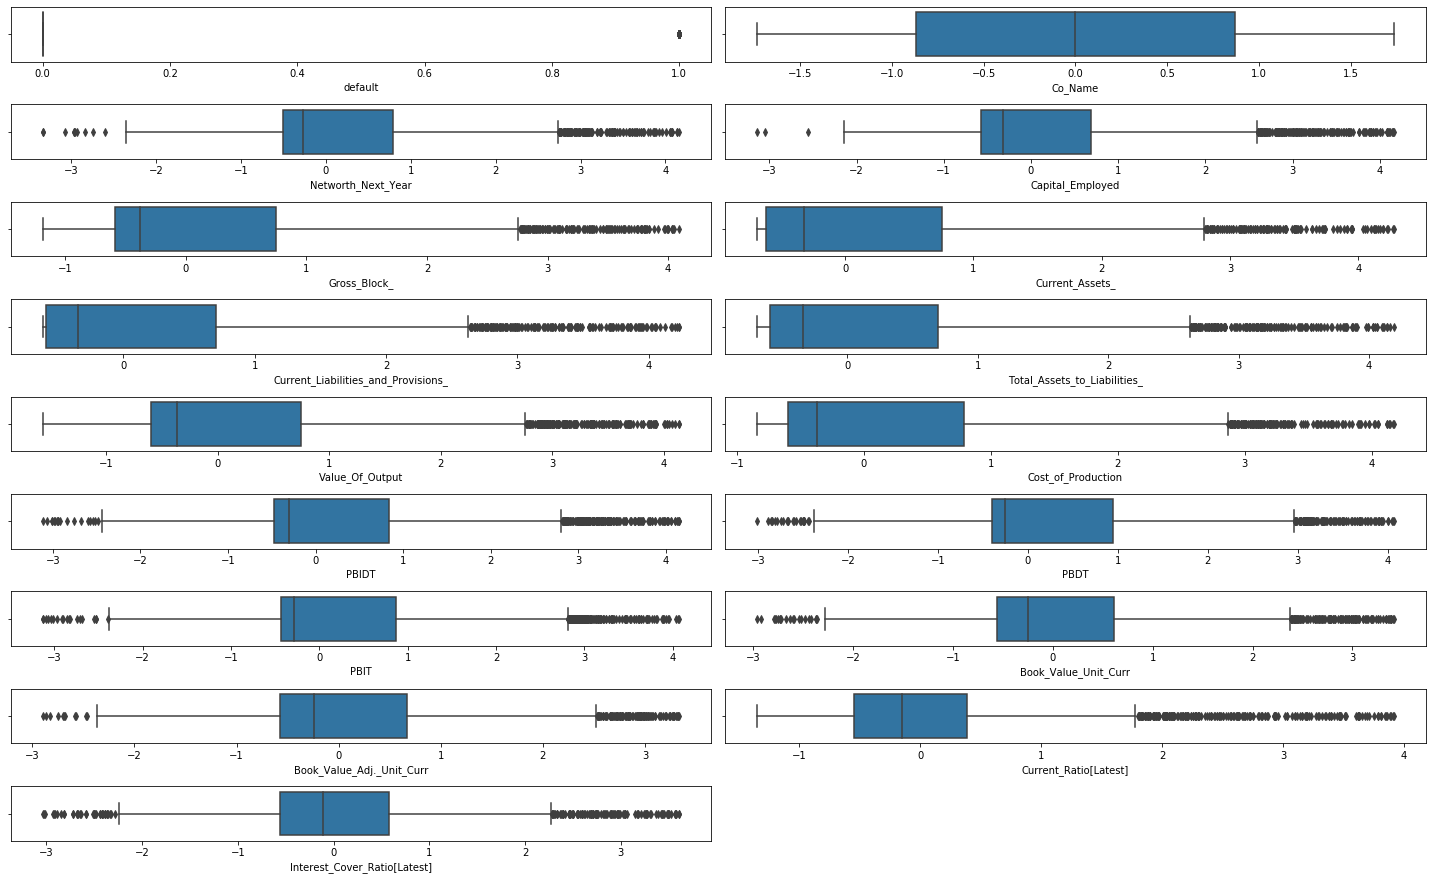

In [106]:
data_plot=Company_imputed[j]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(15,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

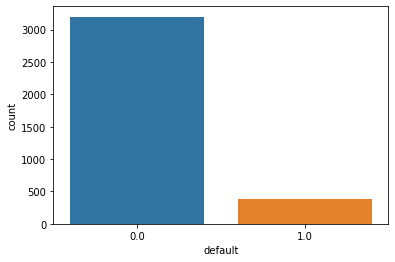

In [107]:
sns.countplot(Company_imputed['default'])

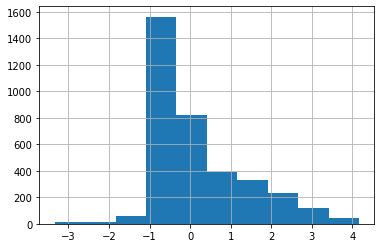

In [139]:
Company_imputed['Networth_Next_Year'].hist()

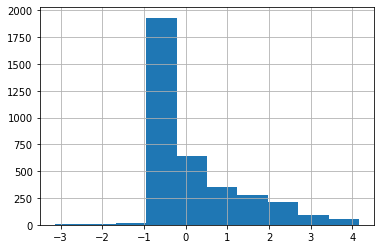

In [141]:
Company_imputed['Capital_Employed'].hist()

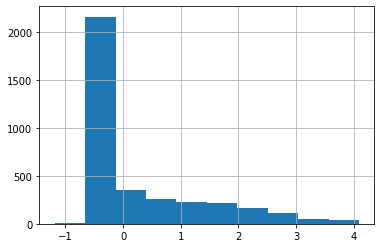

In [142]:
Company_imputed['Gross_Block_'].hist()

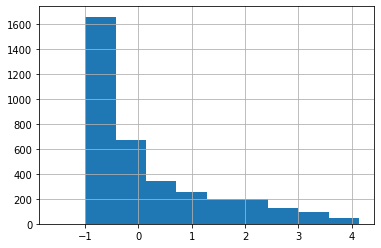

In [147]:
Company_imputed['Value_Of_Output'].hist()

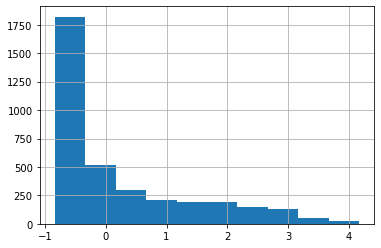

In [148]:
Company_imputed['Cost_of_Production'].hist()

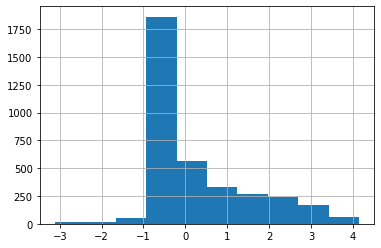

In [150]:
Company_imputed['PBIDT'].hist()

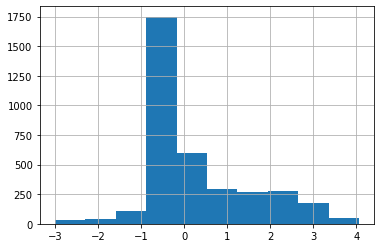

In [151]:
Company_imputed['PBDT'].hist()

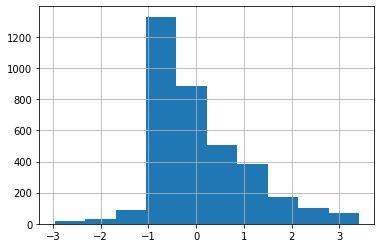

In [153]:
Company_imputed['Book_Value_Unit_Curr'].hist()

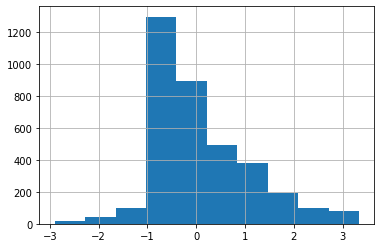

In [154]:
Company_imputed['Book_Value_Adj._Unit_Curr'].hist()

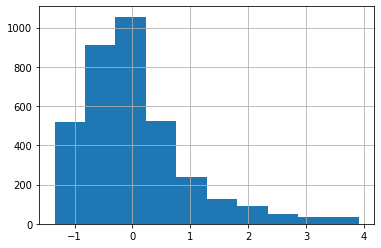

In [155]:
Company_imputed['Current_Ratio[Latest]'].hist()

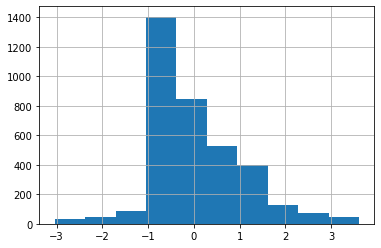

In [156]:
Company_imputed['Interest_Cover_Ratio[Latest]'].hist()

In [ ]:
## Bivariate Analysis

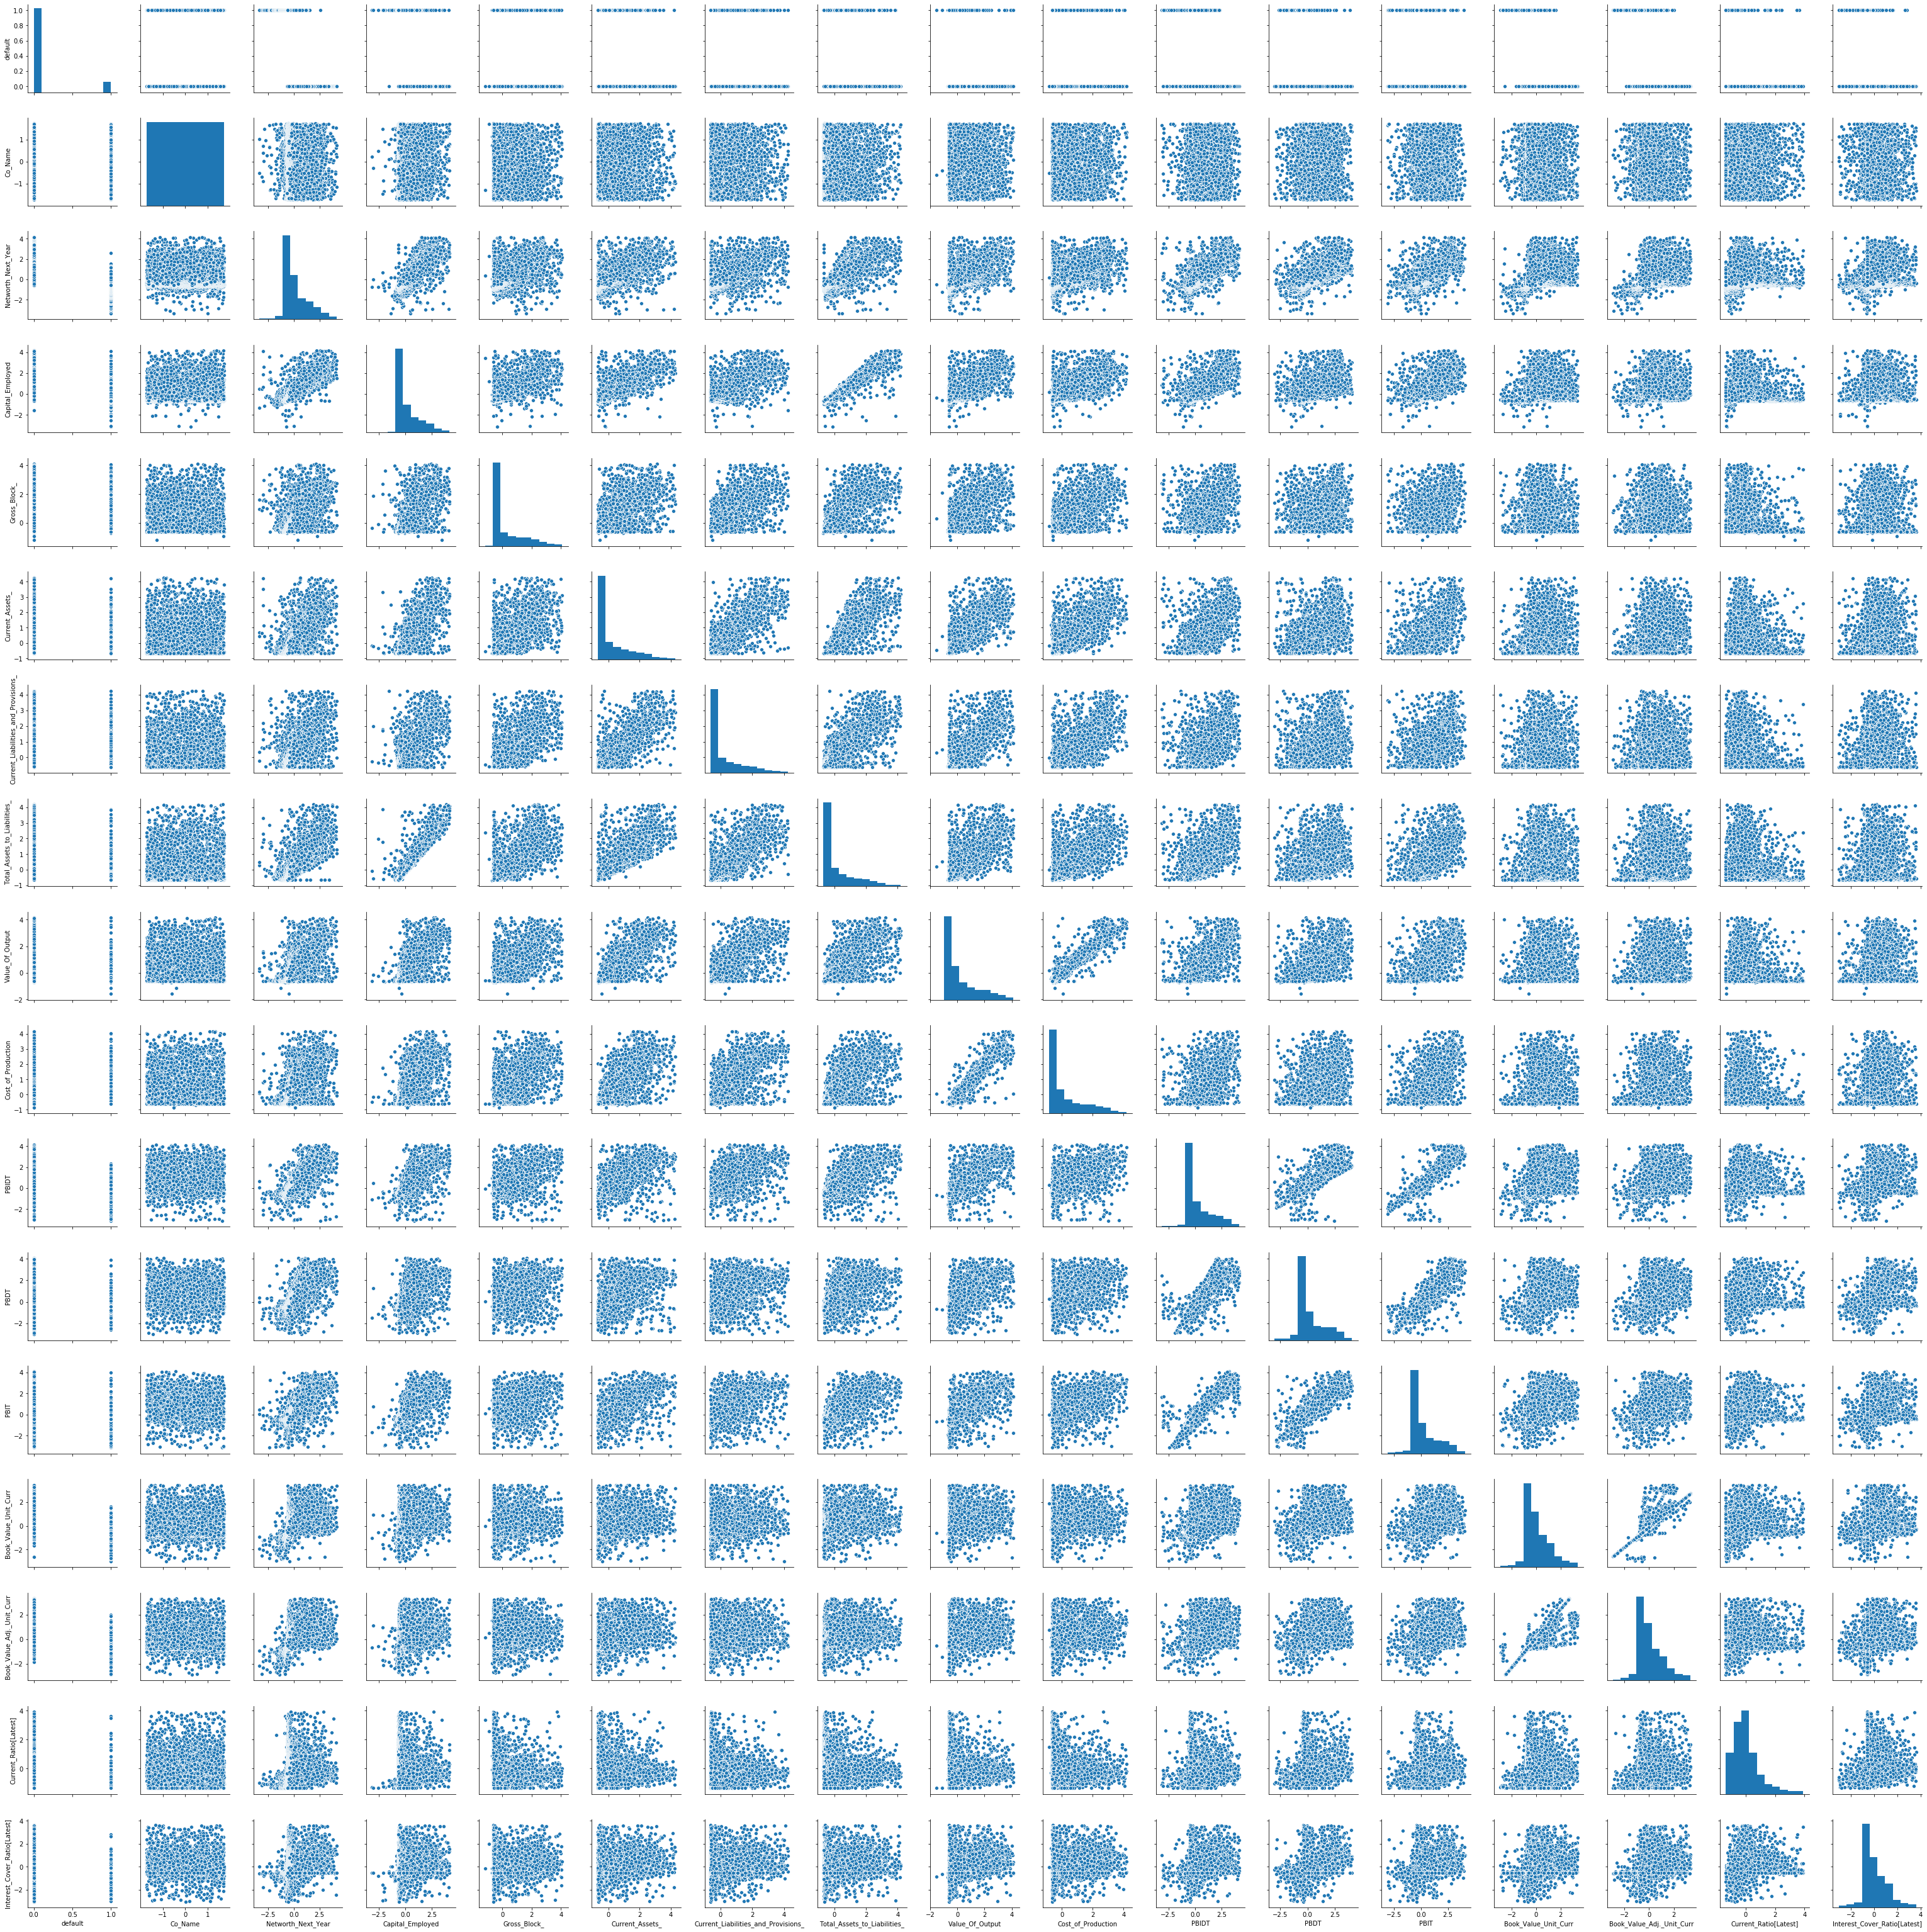

In [133]:
sns.pairplot(Company_imputed[j])

In [148]:
Company_imputed[j].corr(method='pearson')

default  Co_Name  Networth_Next_Year  \
default                                 1.00     0.03               -0.32   
Co_Name                                 0.03     1.00               -0.04   
Networth_Next_Year                     -0.32    -0.04                1.00   
Capital_Employed                       -0.14    -0.00                0.80   
Gross_Block_                            0.02    -0.00                0.60   
Current_Assets_                        -0.09    -0.03                0.70   
Current_Liabilities_and_Provisions_    -0.00    -0.02                0.63   
Total_Assets_to_Liabilities_           -0.08    -0.01                0.77   
Value_Of_Output                        -0.11    -0.01                0.68   
Cost_of_Production                     -0.08    -0.02                0.63   
PBIDT                                  -0.22    -0.03                0.77   
PBDT                                   -0.23    -0.03                0.72   
PBIT                                   -0.21    -0.03                0.73   
Book_Value_Unit_Curr                   -0.38    -0.05                0.56   
Book_Value_Adj._Unit_Curr              -0.37    -0.04                0.56   
Current_Ratio[Latest]                  -0.30    -0.03                0.09   
Interest_Cover_Ratio[Latest]           -0.26    -0.03                0.38   

                                     Capital_Employed  Gross_Block_  \
default                                         -0.14          0.02   
Co_Name                                         -0.00         -0.00   
Networth_Next_Year                               0.80          0.60   
Capital_Employed                                 1.00          0.74   
Gross_Block_                                     0.74          1.00   
Current_Assets_                                  0.83          0.73   
Current_Liabilities_and_Provisions_              0.76          0.77   
Total_Assets_to_Liabilities_                     0.94          0.78   
Value_Of_Output                                  0.77          0.76   
Cost_of_Production                               0.73          0.76   
PBIDT                                            0.76          0.65   
PBDT                                             0.63          0.55   
PBIT                                             0.72          0.59   
Book_Value_Unit_Curr                             0.45          0.33   
Book_Value_Adj._Unit_Curr                        0.45          0.34   
Current_Ratio[Latest]                           -0.04         -0.14   
Interest_Cover_Ratio[Latest]                     0.27          0.23   

                                     Current_Assets_  \
default                                        -0.09   
Co_Name                                        -0.03   
Networth_Next_Year                              0.70   
Capital_Employed                                0.83   
Gross_Block_                                    0.73   
Current_Assets_                                 1.00   
Current_Liabilities_and_Provisions_             0.86   
Total_Assets_to_Liabilities_                    0.86   
Value_Of_Output                                 0.84   
Cost_of_Production                              0.82   
PBIDT                                           0.71   
PBDT                                            0.59   
PBIT                                            0.71   
Book_Value_Unit_Curr                            0.42   
Book_Value_Adj._Unit_Curr                       0.42   
Current_Ratio[Latest]                          -0.04   
Interest_Cover_Ratio[Latest]                    0.28   

                                     Current_Liabilities_and_Provisions_  \
default                                                            -0.00   
Co_Name                                                            -0.02   
Networth_Next_Year                                                  0.63   
Capital_Employed                                          

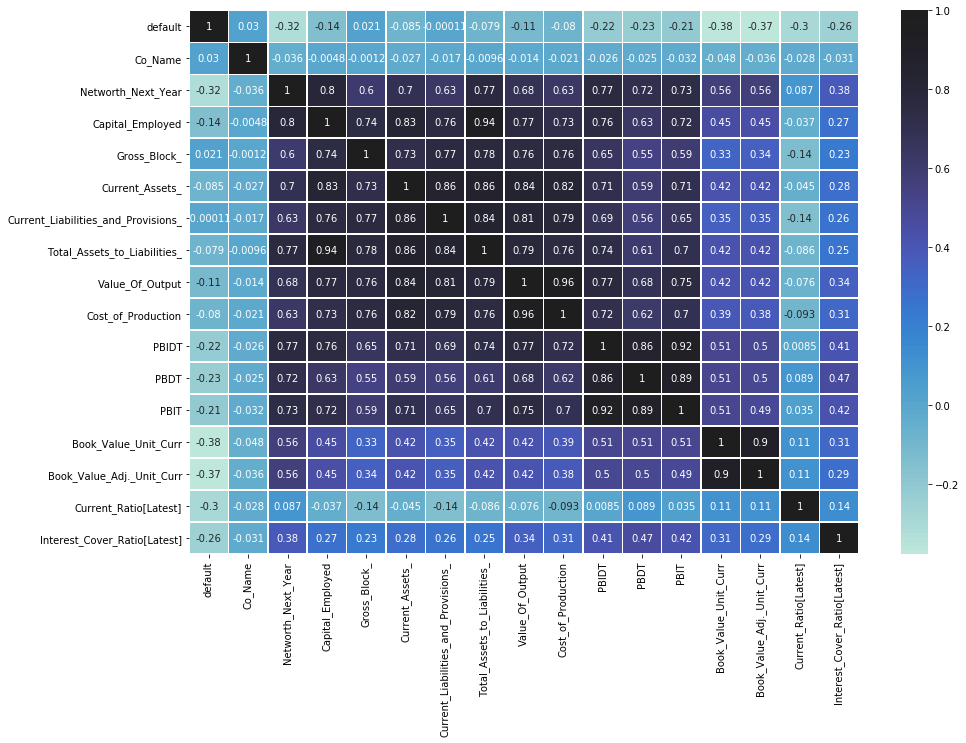

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap(Company_imputed[j].corr(), annot=True, linewidths=.5, center = 1 )  # heatmap
plt.show()

## Bar plot between Total Asset to Liablities and Capital Employed

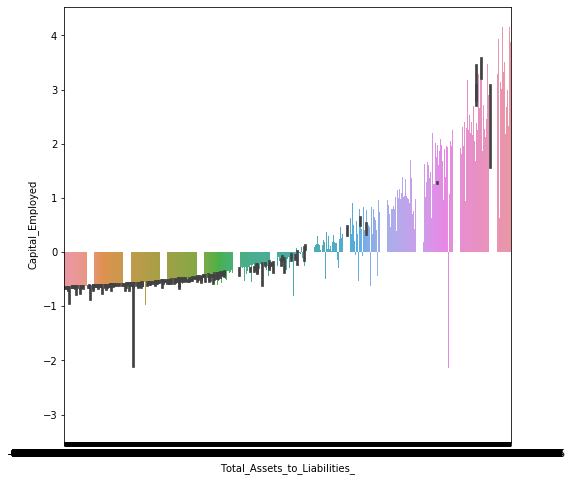

In [172]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed['Total_Assets_to_Liabilities_'],Company_imputed['Capital_Employed']) 
plt.show()

**The total assent to liabilities ratio increases with increase in Capital Employed.As they are highly correlated.**

## Bar Plot between PBIT and PBIDT

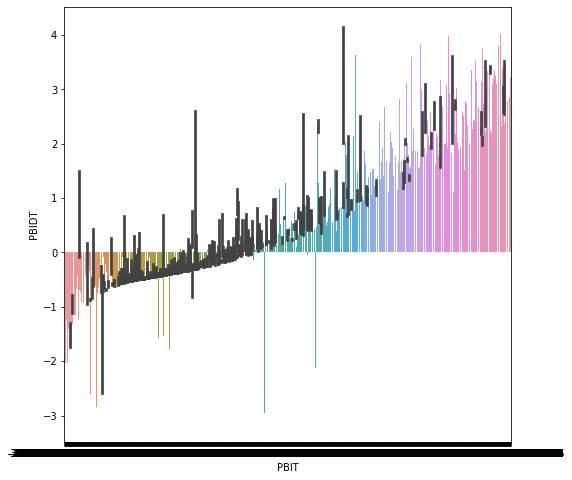

In [173]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed['PBIT'],Company_imputed['PBIDT']) 
plt.show()

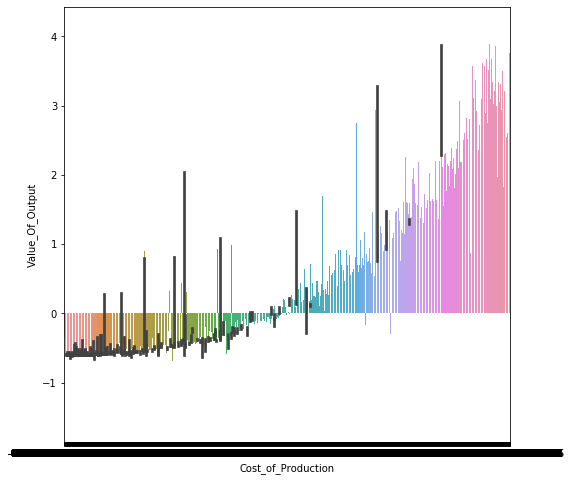

In [174]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed['Cost_of_Production'],Company_imputed['Value_Of_Output']) 
plt.show()

## Barplot between default and Value of output

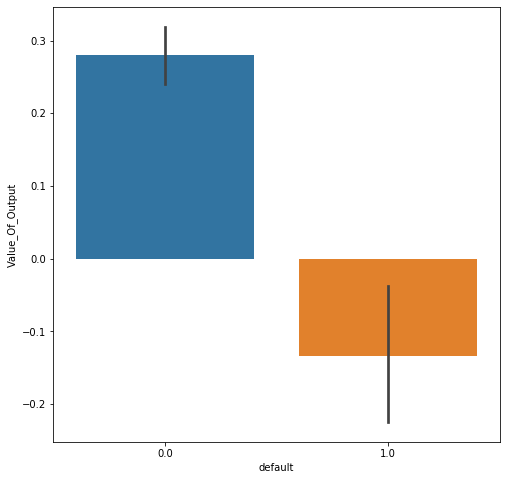

In [176]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed['default'],Company_imputed['Value_Of_Output']) 
plt.show()

## Bar Plot between default and Networth

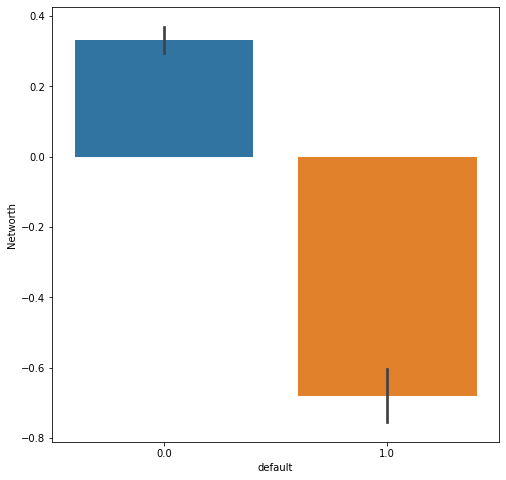

In [177]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed['default'],Company_imputed['Networth']) 
plt.show()

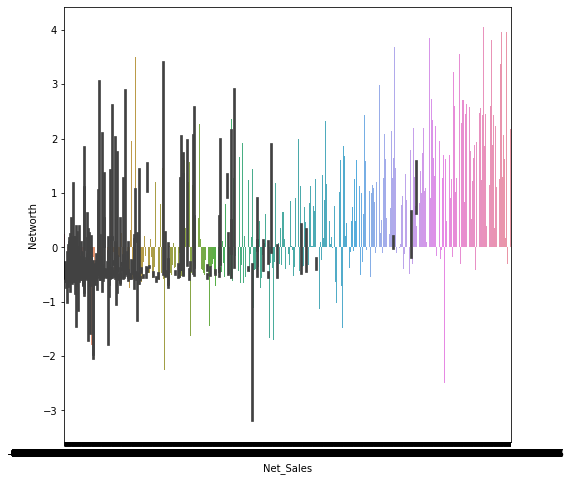

In [178]:
plt.figure(figsize=(8,8))
sns.barplot(Company_imputed[''],Company_imputed['Networth']) 
plt.show()